<a href="https://colab.research.google.com/github/yohanaaritonang/predicting-employees-performance-with-apriori-algorithm/blob/main/Exploratory-Data-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd

In [120]:
#mengimpor file berupa csv
import io
%time employee = pd.read_csv("D:/Folder Mata Kuliah/Semester 7/DAMI/Proyek/Dataset/employee.csv", delimiter=',', index_col =0)

Wall time: 604 ms


In [121]:
employee.sample(5)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
19445,Sales & Marketing,region_7,Bachelor's,male,sourcing,3,26,Good,3,No,No,52,No
68276,Finance,region_25,Bachelor's,male,sourcing,2,29,Great,2,No,No,56,No
52791,Procurement,region_19,Bachelor's,male,sourcing,1,39,Low,14,No,No,71,No
25139,Sales & Marketing,region_7,Master's & above,male,other,1,45,Excellent,17,Yes,No,53,No
40569,Procurement,region_19,Bachelor's,male,other,1,39,Great,7,No,No,70,No


In [122]:
employee.describe()

,no_of_trainings,age,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,5.865512,63.386750
std,0.609264,7.660169,4.265094,13.371559
min,1.000000,20.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,51.000000
50%,1.000000,33.000000,5.000000,60.000000
75%,1.000000,39.000000,7.000000,76.000000
max,10.000000,60.000000,37.000000,99.000000


## SEABORN

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [124]:
# standard import statement for seaborn
import seaborn as sns

In [125]:
employee.shape

(54808, 13)

In [126]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           54808 non-null  object
 1   region               54808 non-null  object
 2   education            52399 non-null  object
 3   gender               54808 non-null  object
 4   recruitment_channel  54808 non-null  object
 5   no_of_trainings      54808 non-null  int64 
 6   age                  54808 non-null  int64 
 7   performance_rating   50684 non-null  object
 8   length_of_service    54808 non-null  int64 
 9   KPIs_met >80%        54808 non-null  object
 10  awards_won?          54808 non-null  object
 11  avg_training_score   54808 non-null  int64 
 12  is_promoted          54808 non-null  object
dtypes: int64(4), object(9)
memory usage: 5.9+ MB


## Menganalisis Variabel secara Individual

In [127]:
numerical_vars = ['no_of_trainings', 'age', 
                 'length_of_service', 'avg_training_score']
categorical_vars = ['department', 'region', 'education', 'gender', 'recruitment_channel',
                   'performance_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted']

In [128]:
employee = employee[numerical_vars + categorical_vars]
employee.shape

(54808, 13)

## Memahami Variabel Utama

In [129]:
employee['performance_rating'].describe()

count     50684
unique        5
top       Great
freq      18618
Name: performance_rating, dtype: object

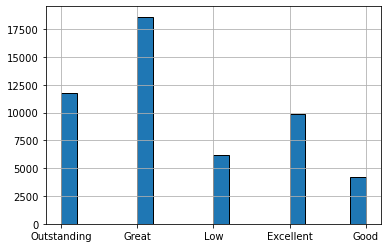

In [130]:
employee['performance_rating'].hist(edgecolor='black', bins=20);

In [131]:
print("Skewness: {:0.3f}".format(employee['length_of_service'].skew()))
print("Kurtosis: {:0.3f}".format(employee['length_of_service'].kurt()))

Skewness: 1.738
Kurtosis: 4.414


# Variabel Numerika

In [132]:
employee[numerical_vars].describe()

,no_of_trainings,age,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,5.865512,63.386750
std,0.609264,7.660169,4.265094,13.371559
min,1.000000,20.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,51.000000
50%,1.000000,33.000000,5.000000,60.000000
75%,1.000000,39.000000,7.000000,76.000000
max,10.000000,60.000000,37.000000,99.000000


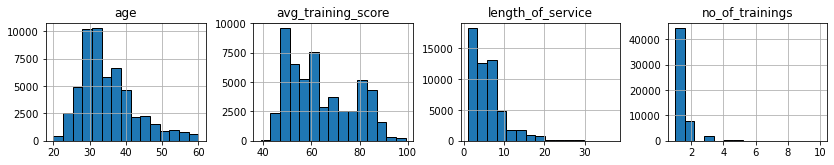

In [133]:
employee[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));

In [134]:
employee['age_start_of_service'] = employee['age'] - employee['length_of_service']

In [135]:
employee['age_start_of_service']

employee_id
65438    27
65141    26
7513     27
2542     29
48945    43
         ..
3030     31
74592    31
13918    24
13614    27
51526    22
Name: age_start_of_service, Length: 54808, dtype: int64

In [136]:
numerical_vars.append('age_start_of_service')

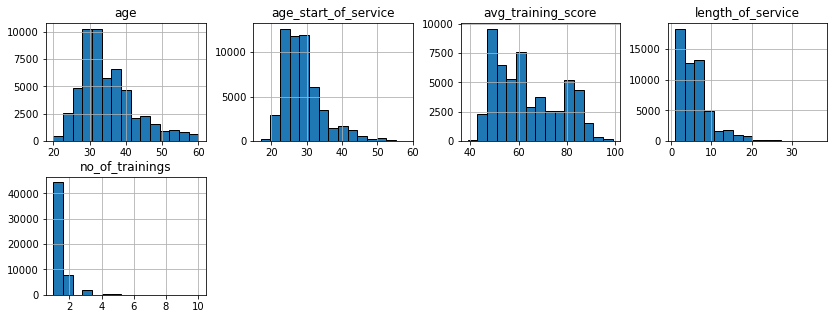

In [137]:
employee[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14,5), layout = (2,4));

# Variabel Kategorikal

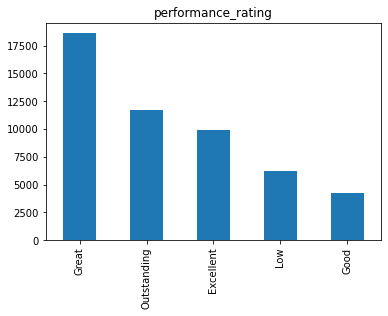

In [138]:
employee['performance_rating'].value_counts().plot(kind='bar', title='performance_rating');

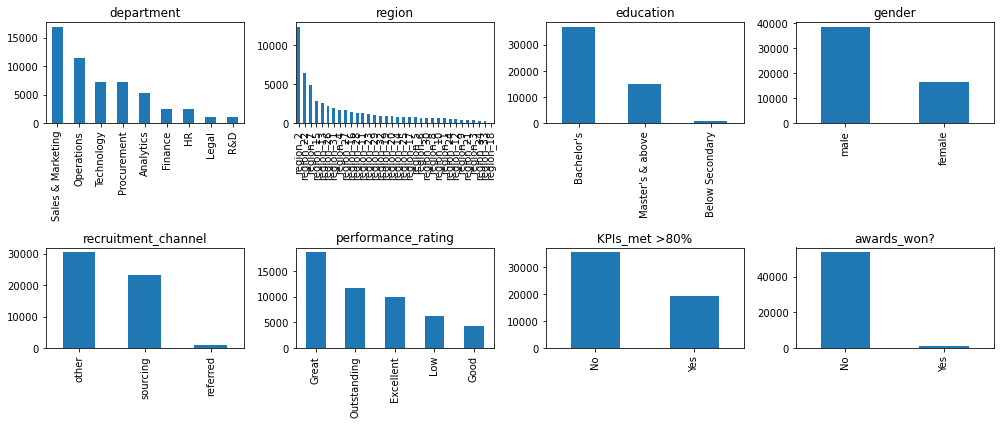

In [139]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    employee[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
    fig.tight_layout()

In [140]:
def identify_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [141]:
levels_to_keep = employee[categorical_vars].apply(identify_cat_above30, axis=0)
levels_to_keep

department             [Sales & Marketing, Operations, Technology, Pr...
region                 [region_2, region_22, region_7, region_15, reg...
education                [Bachelor's, Master's & above, Below Secondary]
gender                                                    [male, female]
recruitment_channel                          [other, sourcing, referred]
performance_rating            [Great, Outstanding, Excellent, Low, Good]
KPIs_met >80%                                                  [No, Yes]
awards_won?                                                    [No, Yes]
is_promoted                                                    [No, Yes]
dtype: object

In [142]:
for var in categorical_vars:
    employee = employee.loc[employee[var].isin(levels_to_keep[var])]

In [143]:
employee.shape

(48660, 14)

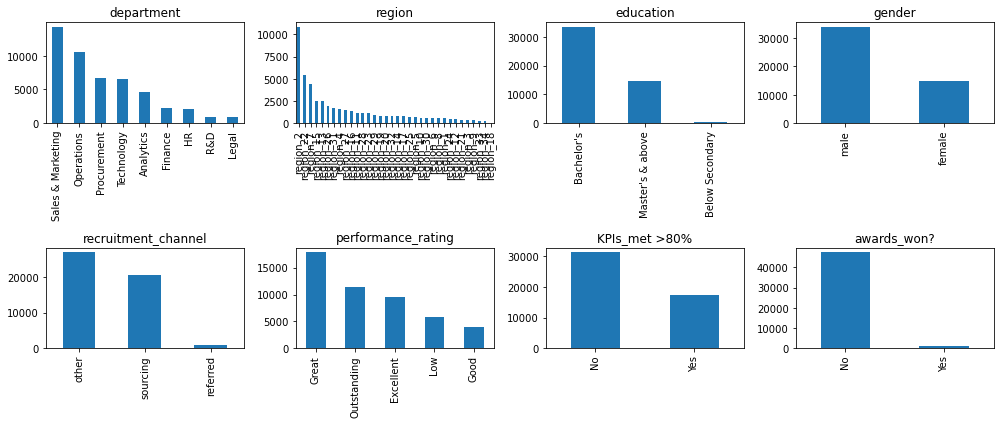

In [144]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    employee[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
    fig.tight_layout()

## Hubungan Antara Variabel dengan Scatter Plot

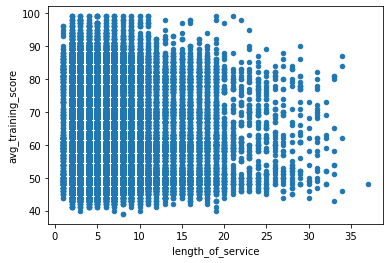

In [145]:
employee.plot.scatter(x='length_of_service', y='avg_training_score');

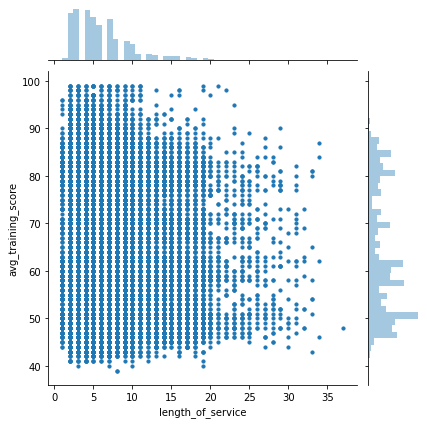

In [146]:
sns.jointplot(x='length_of_service', y='avg_training_score', data=employee, joint_kws={"s": 10});

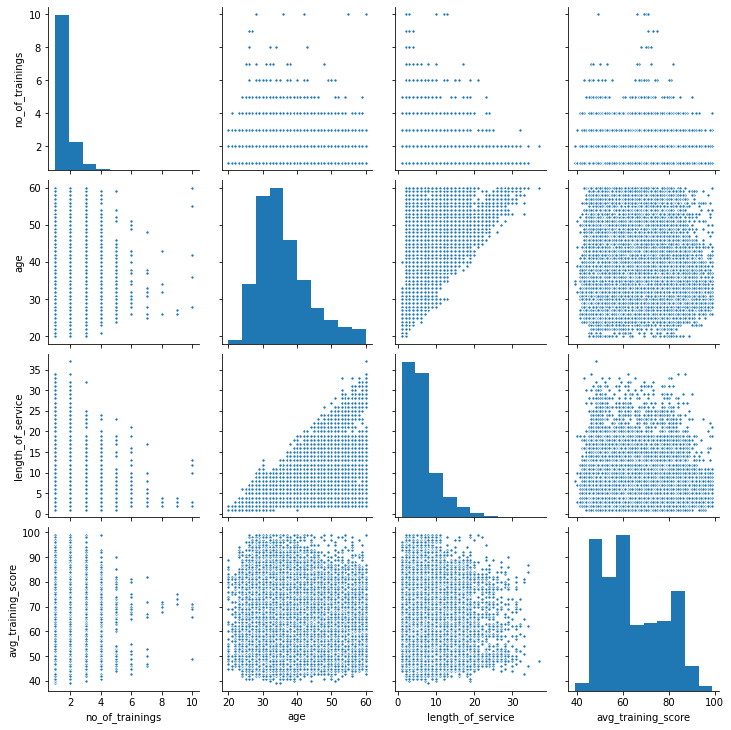

In [147]:
sns.pairplot(employee[numerical_vars[:4]], plot_kws={"s": 10});

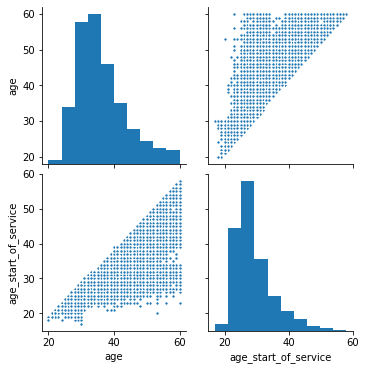

In [148]:
sns.pairplot(employee[['age']+numerical_vars[4:]], plot_kws={"s": 10});

In [149]:
employee[numerical_vars].corr()

,no_of_trainings,age,length_of_service,avg_training_score,age_start_of_service
no_of_trainings,1.000000,-0.083590,-0.055440,0.042033,-0.066918
age,-0.083590,1.000000,0.620348,-0.066214,0.830974
length_of_service,-0.055440,0.620348,1.000000,-0.047461,0.079164
avg_training_score,0.042033,-0.066214,-0.047461,1.000000,-0.050493
age_start_of_service,-0.066918,0.830974,0.079164,-0.050493,1.000000


In [150]:
employee[numerical_vars].corr()['age'].sort_values(ascending=False)

age                     1.000000
age_start_of_service    0.830974
length_of_service       0.620348
avg_training_score     -0.066214
no_of_trainings        -0.083590
Name: age, dtype: float64

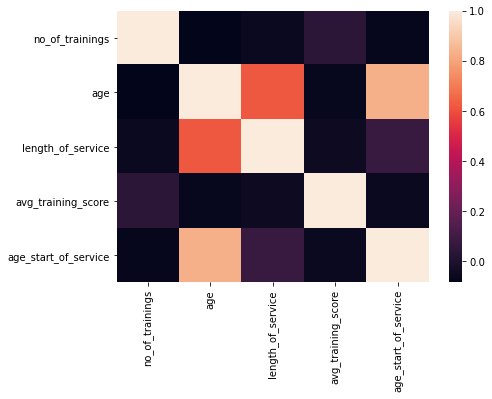

In [151]:
correlations = employee[numerical_vars].corr()
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax);

## Hubungan Antara Variabel dengan Scatter Plot

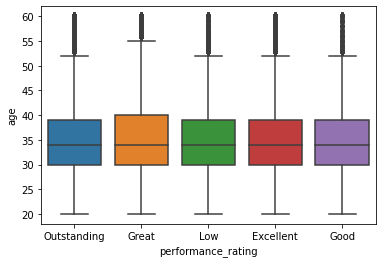

In [152]:
sns.boxplot(x='performance_rating', y='age', data=employee);

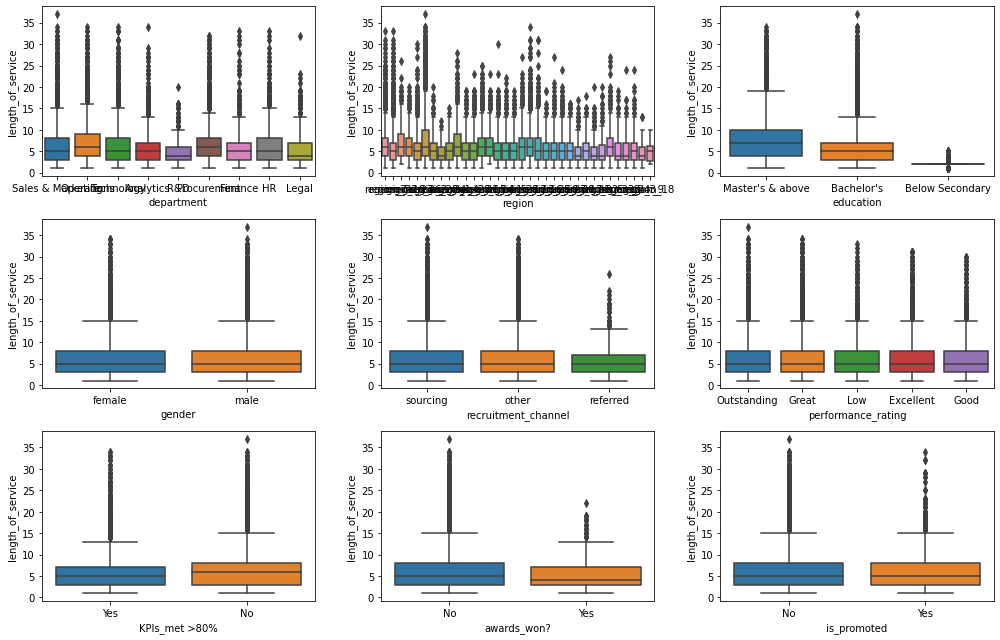

In [153]:
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='length_of_service', data=employee, ax=subplot)
    
    fig.tight_layout()

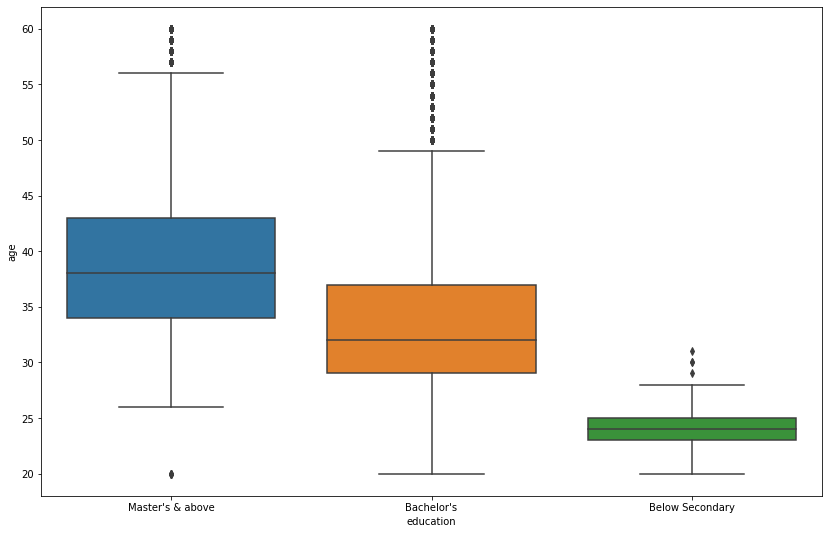

In [154]:
fig, ax = plt.subplots(figsize=(14,9))
sns.boxplot(x='education', y='age', data=employee,ax=ax);

In [155]:
sorted_nb = employee.groupby('education')['age'].median().sort_values().index.values

In [156]:
sorted_nb

array(['Below Secondary', "Bachelor's", "Master's & above"], dtype=object)

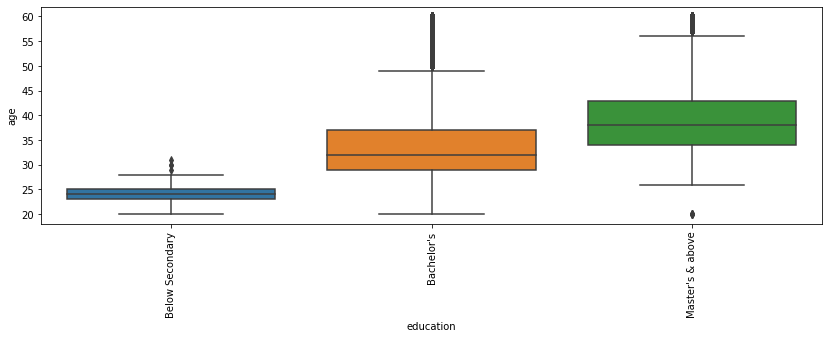

In [157]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='education', y='age', data=employee, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');

## Hubungan Antara Variabel dengan Complex Conditional Plots

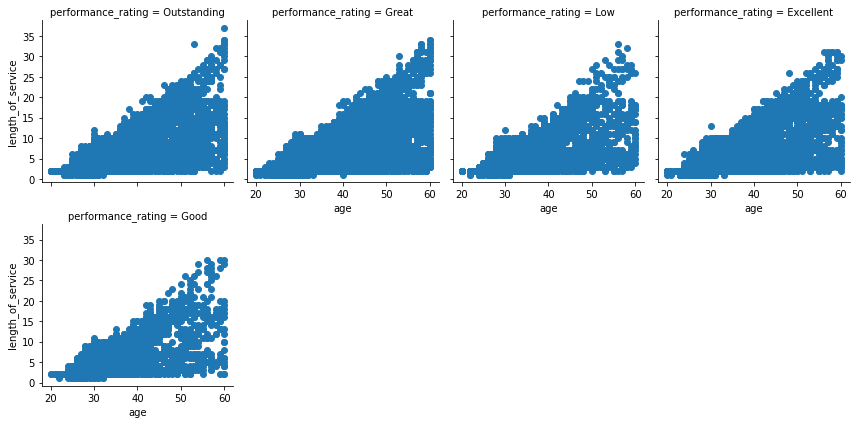

In [158]:
conditional_plot = sns.FacetGrid(employee, col="performance_rating", col_wrap=4)
conditional_plot.map(plt.scatter, "age", "length_of_service");

# Data Cleaning

In [160]:
#check missing value

round (data.isnull().sum()/ len(data) * 100, 4)

department             0.0000
region                 0.0000
education              4.3953
gender                 0.0000
recruitment_channel    0.0000
no_of_trainings        0.0000
age                    0.0000
performance_rating     7.5244
length_of_service      0.0000
KPIs_met >80%          0.0000
awards_won?            0.0000
avg_training_score     0.0000
is_promoted            0.0000
dtype: float64

In [57]:
Terdapat missing value pada atribut education dan performance_rating

## Handling Missing data (Drop Missing Values)

In [162]:
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,performance_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,female,sourcing,1,35,Outstanding,8,Yes,No,49,No
65141,Operations,region_22,Bachelor's,male,other,1,30,Outstanding,4,No,No,60,No
7513,Sales & Marketing,region_19,Bachelor's,male,sourcing,1,34,Great,7,No,No,50,No
2542,Sales & Marketing,region_23,Bachelor's,male,other,2,39,Low,10,No,No,50,No
48945,Technology,region_26,Bachelor's,male,other,1,45,Great,2,No,No,73,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,Technology,region_14,Bachelor's,male,sourcing,1,48,Great,17,No,No,78,No
74592,Operations,region_27,Master's & above,female,other,1,37,Good,6,No,No,56,No
13918,Analytics,region_1,Bachelor's,male,other,1,27,Outstanding,3,Yes,No,79,No


In [163]:
# change data to dataframe
data_df = pd.DataFrame(data)
print (data_df)

                    department     region         education  gender  \
employee_id                                                           
65438        Sales & Marketing   region_7  Master's & above  female   
65141               Operations  region_22        Bachelor's    male   
7513         Sales & Marketing  region_19        Bachelor's    male   
2542         Sales & Marketing  region_23        Bachelor's    male   
48945               Technology  region_26        Bachelor's    male   
...                        ...        ...               ...     ...   
3030                Technology  region_14        Bachelor's    male   
74592               Operations  region_27  Master's & above  female   
13918                Analytics   region_1        Bachelor's    male   
13614        Sales & Marketing   region_9               NaN    male   
51526                       HR  region_22        Bachelor's    male   

            recruitment_channel  no_of_trainings  age performance_rating  \


In [164]:
print(data.shape)

(54808, 13)


In [165]:
# drop missing value
data_dropna = data.dropna()
print(data_dropna.shape)

(48660, 13)


In [166]:
print(data_dropna)

                    department     region         education  gender  \
employee_id                                                           
65438        Sales & Marketing   region_7  Master's & above  female   
65141               Operations  region_22        Bachelor's    male   
7513         Sales & Marketing  region_19        Bachelor's    male   
2542         Sales & Marketing  region_23        Bachelor's    male   
48945               Technology  region_26        Bachelor's    male   
...                        ...        ...               ...     ...   
6915         Sales & Marketing  region_14        Bachelor's    male   
3030                Technology  region_14        Bachelor's    male   
74592               Operations  region_27  Master's & above  female   
13918                Analytics   region_1        Bachelor's    male   
51526                       HR  region_22        Bachelor's    male   

            recruitment_channel  no_of_trainings  age performance_rating  \


In [167]:
#recheck missing value
round (data_dropna.isnull().sum()/ len(data_dropna) * 100, 4)

department             0.0
region                 0.0
education              0.0
gender                 0.0
recruitment_channel    0.0
no_of_trainings        0.0
age                    0.0
performance_rating     0.0
length_of_service      0.0
KPIs_met >80%          0.0
awards_won?            0.0
avg_training_score     0.0
is_promoted            0.0
dtype: float64

In [168]:
data[['education', 'performance_rating']].isnull().sum()

education             2409
performance_rating    4124
dtype: int64

In [169]:
data_dropna[['education', 'performance_rating']].isnull().sum()

education             0
performance_rating    0
dtype: int64

Nothing missing value